In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Data Manipulations

This study will focus on 6 countries of the  Community of Sahel–Saharan States: *'Benin', 'Central African Rebublic', 'Chad', 'Niger', 'Soudan', 'Togo'*

In [ ]:
input_crop_nutrient_data = pd.read_csv("https://github.com/cycyBell/ai-ds-extended/raw/main/data_hub/input_nutrient.csv")
output_crop_nutrient_data = pd.read_csv("https://github.com/cycyBell/ai-ds-extended/raw/main/data_hub/output_nutrient.csv")
crop_emission_data = pd.read_csv("https://github.com/cycyBell/ai-ds-extended/raw/main/data_hub/crops%20emissions.csv")
natural_disaster_data = pd.read_csv("https://github.com/cycyBell/ai-ds-extended/raw/main/data_hub/emdat_africa_1992-2023_natural.csv")
temperature_change = pd.read_csv("https://github.com/cycyBell/ai-ds-extended/raw/main/data_hub/temperature%20change%20statistics.csv")
precipitation_data = pd.read_csv("https://github.com/cycyBell/ai-ds-extended/raw/main/data_hub/precipitation.csv", skiprows = 4)
pesticides_use_data = pd.read_csv("https://github.com/cycyBell/ai-ds-extended/raw/main/data_hub/pesticides%20use.csv")
agriculture_emissions_data = pd.read_csv("https://github.com/cycyBell/ai-ds-extended/raw/main/data_hub/Emissions%20from%20Energy%20use%20in%20agriculture.csv")
land_cover_data = pd.read_csv("https://github.com/cycyBell/ai-ds-extended/raw/main/data_hub/Land%20Cover.csv")
prices_data = pd.read_csv("https://github.com/cycyBell/ai-ds-extended/raw/main/data_hub/Prices_E_Africa.csv")
production_data = pd.read_csv("https://github.com/cycyBell/ai-ds-extended/raw/main/data_hub/Production_Crops_Livestock_E_Africa.csv")

In [ ]:
target_countries = ['Benin', 'Central African Republic', 'Chad', 'Niger', 'Sudan (former)', 'Togo']


In [ ]:
input_crop_nutrient = input_crop_nutrient_data[input_crop_nutrient_data['Area'].isin(target_countries)]
output_crop_nutrient = output_crop_nutrient_data[output_crop_nutrient_data['Area'].isin(target_countries)]
crop_emission = crop_emission_data[crop_emission_data['Area'].isin(target_countries)]
temperature_change = temperature_change[temperature_change['Area'].isin(target_countries)]
pesticides_use = pesticides_use_data[pesticides_use_data['Area'].isin(target_countries)]
agriculture_emissions = agriculture_emissions_data[agriculture_emissions_data['Area'].isin(target_countries)]
land_cover = land_cover_data[land_cover_data['Area'].isin(target_countries)]
prices = prices_data[prices_data['Area'].isin(target_countries)]
production = production_data[production_data['Area'].isin(target_countries)]

## Working on ***crop_nutrients*** data frames

In [ ]:
input_crop_nutrient.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
372,ESB,Cropland Nutrient Balance,204,Benin,7276,Cropland nitrogen per unit area,5079,Input,1961,1961,kg/ha,18.3131,E,Estimated value,NaN
373,ESB,Cropland Nutrient Balance,204,Benin,7281,Cropland phosphorus per unit area,5079,Input,1961,1961,kg/ha,1.4967,E,Estimated value,NaN
374,ESB,Cropland Nutrient Balance,204,Benin,7283,Cropland potassium per unit area,5079,Input,1961,1961,kg/ha,4.1579,E,Estimated value,NaN
375,ESB,Cropland Nutrient Balance,204,Benin,7276,Cropland nitrogen per unit area,5079,Input,1962,1962,kg/ha,18.2101,E,Estimated value,NaN
376,ESB,Cropland Nutrient Balance,204,Benin,7281,Cropland phosphorus per unit area,5079,Input,1962,1962,kg/ha,1.5977,E,Estimated value,NaN


In [ ]:
output_crop_nutrient.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
372,ESB,Cropland Nutrient Balance,204,Benin,7276,Cropland nitrogen per unit area,5080,Outputs,1961,1961,kg/ha,12.2015,E,Estimated value,NaN
373,ESB,Cropland Nutrient Balance,204,Benin,7281,Cropland phosphorus per unit area,5080,Outputs,1961,1961,kg/ha,2.5893,E,Estimated value,NaN
374,ESB,Cropland Nutrient Balance,204,Benin,7283,Cropland potassium per unit area,5080,Outputs,1961,1961,kg/ha,7.6966,E,Estimated value,NaN
375,ESB,Cropland Nutrient Balance,204,Benin,7276,Cropland nitrogen per unit area,5080,Outputs,1962,1962,kg/ha,11.5085,E,Estimated value,NaN
376,ESB,Cropland Nutrient Balance,204,Benin,7281,Cropland phosphorus per unit area,5080,Outputs,1962,1962,kg/ha,2.4164,E,Estimated value,NaN


In [ ]:
input_crop_nutrient['Item'].unique()

array(['Input'], dtype=object)

In [ ]:
input_crop_nutrient['Element'].unique()

array(['Cropland nitrogen per unit area',
       'Cropland phosphorus per unit area',
       'Cropland potassium per unit area'], dtype=object)

In [ ]:
input_crop_nutrient.drop(columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Item Code','Item', 'Year Code', 'Unit', 'Flag','Flag Description','Note'], inplace = True)
output_crop_nutrient.drop(columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Item Code','Item', 'Year Code', 'Unit', 'Flag','Flag Description','Note'], inplace = True)

<ipython-input-9-fa0aedd8403b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_crop_nutrient.drop(columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Item Code','Item', 'Year Code', 'Unit', 'Flag','Flag Description','Note'], inplace = True)
<ipython-input-9-fa0aedd8403b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output_crop_nutrient.drop(columns = ['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Item Code','Item', 'Year Code', 'Unit', 'Flag','Flag Description','Note'], inplace = True)


In [ ]:
input_crop_nutrient.head()

,Area,Element,Year,Value
372,Benin,Cropland nitrogen per unit area,1961,18.3131
373,Benin,Cropland phosphorus per unit area,1961,1.4967
374,Benin,Cropland potassium per unit area,1961,4.1579
375,Benin,Cropland nitrogen per unit area,1962,18.2101
376,Benin,Cropland phosphorus per unit area,1962,1.5977


In [ ]:
output_crop_nutrient.head()

,Area,Element,Year,Value
372,Benin,Cropland nitrogen per unit area,1961,12.2015
373,Benin,Cropland phosphorus per unit area,1961,2.5893
374,Benin,Cropland potassium per unit area,1961,7.6966
375,Benin,Cropland nitrogen per unit area,1962,11.5085
376,Benin,Cropland phosphorus per unit area,1962,2.4164


In [ ]:
input_crop_nutrient.reset_index(drop = True, inplace = True)
output_crop_nutrient.reset_index(drop = True, inplace = True)

In [ ]:
input_crop_nutrient = input_crop_nutrient.pivot(columns='Element', values='Value', index = ['Area', 'Year'])
output_crop_nutrient = output_crop_nutrient.pivot(columns='Element', values='Value', index = ['Area', 'Year'])

In [ ]:
input_crop_nutrient.reset_index(inplace = True)
output_crop_nutrient.reset_index(inplace = True)

In [ ]:
input_crop_nutrient.head()


Element,Area,Year,Cropland nitrogen per unit area,Cropland phosphorus per unit area,Cropland potassium per unit area
0,Benin,1961,18.3131,1.4967,4.1579
1,Benin,1962,18.2101,1.5977,4.3895
2,Benin,1963,18.4308,1.6953,4.3702
3,Benin,1964,17.0247,1.8154,4.8220
4,Benin,1965,18.2488,1.8122,5.1954


In [ ]:
output_crop_nutrient.head()

Element,Area,Year,Cropland nitrogen per unit area,Cropland phosphorus per unit area,Cropland potassium per unit area
0,Benin,1961,12.2015,2.5893,7.6966
1,Benin,1962,11.5085,2.4164,7.4125
2,Benin,1963,10.9510,2.3197,7.0153
3,Benin,1964,10.8083,2.3133,6.9416
4,Benin,1965,11.1018,2.3385,7.1694


In [ ]:
input_crop_nutrient.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Element,,,,,,,,
Year,310.0,1991.500000,17.924464,1961.0000,1976.00000,1991.5000,2007.000000,2022.0000
Cropland nitrogen per unit area,310.0,18.142073,8.607645,5.0887,10.77330,17.6345,22.472375,42.1471
Cropland phosphorus per unit area,310.0,1.343603,0.985712,0.1644,0.54550,1.1476,1.856000,5.9443
Cropland potassium per unit area,310.0,4.024920,2.660334,0.6354,1.75135,3.2852,5.631325,13.6373


In [ ]:
output_crop_nutrient.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Element,,,,,,,,
Year,310.0,1991.500000,17.924464,1961.0000,1976.000000,1991.50000,2007.000000,2022.0000
Cropland nitrogen per unit area,310.0,11.064107,6.383594,2.2189,6.099425,9.34190,14.170425,33.8847
Cropland phosphorus per unit area,310.0,2.102413,1.273458,0.3781,1.104150,1.81805,2.647550,6.6401
Cropland potassium per unit area,310.0,5.624105,3.694977,0.7034,3.453350,4.50260,6.991200,18.9718


In [ ]:
in_cols = {
                'Cropland nitrogen per unit area' : 'In_nitrogen_per_unit_area',
                'Cropland phosphorus per unit area' : 'In_phosphorus_per_unit_area',
                'Cropland potassium per unit area' : 'In_potassium_per_unit_area'
              }
out_cols = {
                'Cropland nitrogen per unit area' : 'Out_nitrogen_per_unit_area',
                'Cropland phosphorus per unit area' : 'Out_phosphorus_per_unit_area',
                'Cropland potassium per unit area' : 'Out_potassium_per_unit_area'
              }
input_crop_nutrient.rename(columns = in_cols, inplace = True)
output_crop_nutrient.rename(columns = out_cols, inplace = True)


In [ ]:
output_crop_nutrient.head()

Element,Area,Year,Out_nitrogen_per_unit_area,Out_phosphorus_per_unit_area,Out_potassium_per_unit_area
0,Benin,1961,12.2015,2.5893,7.6966
1,Benin,1962,11.5085,2.4164,7.4125
2,Benin,1963,10.9510,2.3197,7.0153
3,Benin,1964,10.8083,2.3133,6.9416
4,Benin,1965,11.1018,2.3385,7.1694


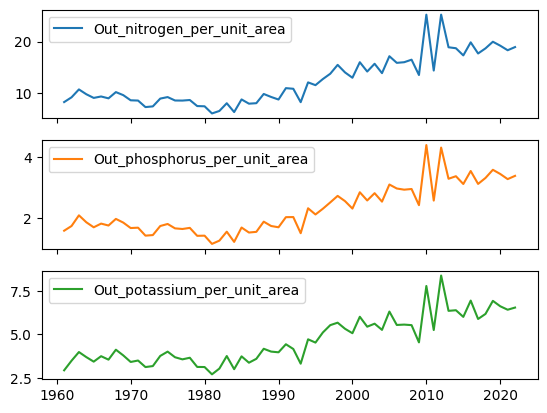

In [ ]:
# @title Crop Nutrients Evolution In Chad
df = output_crop_nutrient[output_crop_nutrient['Area'] == 'Chad']
plot_cols = ['Out_nitrogen_per_unit_area', 'Out_phosphorus_per_unit_area', 'Out_potassium_per_unit_area']
date_time = output_crop_nutrient['Year'].unique()
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)




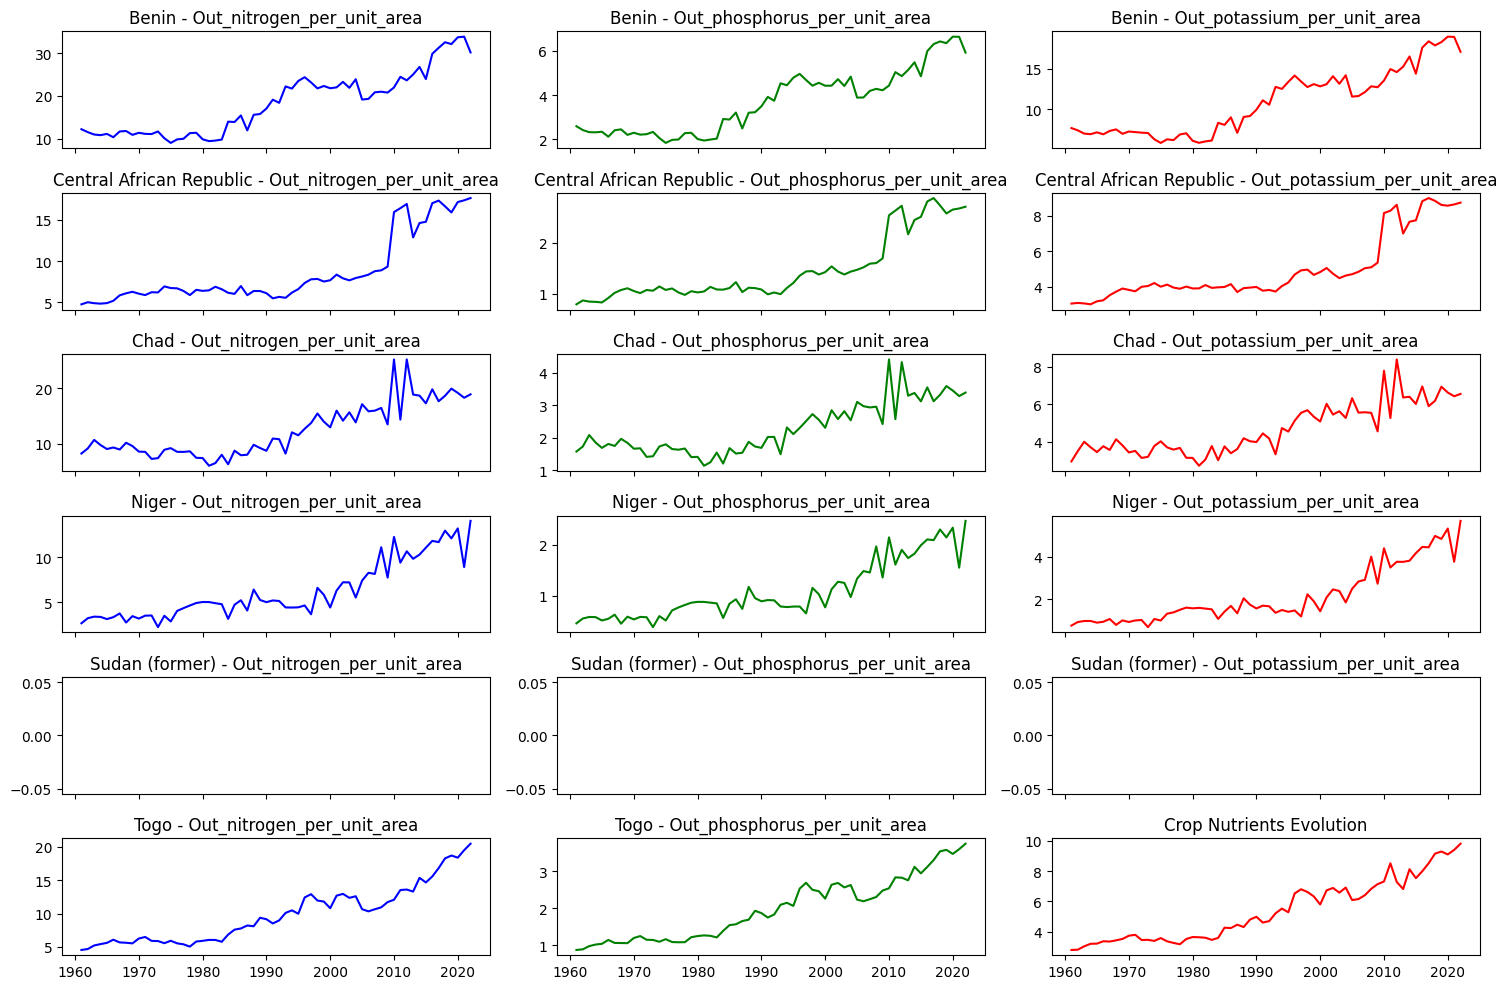

In [ ]:
# @title Crop Nutrients Evolution in the Target Countries

target_countries = ['Benin', 'Central African Republic', 'Chad', 'Niger', 'Sudan (former)', 'Togo']
plot_cols = ['Out_nitrogen_per_unit_area', 'Out_phosphorus_per_unit_area', 'Out_potassium_per_unit_area']

nutrient_colors = {
    'Out_nitrogen_per_unit_area': 'blue',
    'Out_phosphorus_per_unit_area': 'green',
    'Out_potassium_per_unit_area': 'red'
}

fig, axes = plt.subplots(len(target_countries), len(plot_cols), figsize=(15, 10), sharex=True)

for i, country in enumerate(target_countries):
    df = output_crop_nutrient[output_crop_nutrient['Area'] == country]
    date_time = df['Year'].unique()

    for j, nutrient in enumerate(plot_cols):
        plot_features = df[[nutrient]]
        plot_features.index = date_time
        axes[i, j].plot(plot_features, color=nutrient_colors[nutrient])
        axes[i, j].set_title(f"{country} - {nutrient}")

plt.tight_layout()
plt.show()

## Working on ***Temperature change data***

In [ ]:
temperature_change.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,204,Benin,7271,Temperature change,7020,Meteorological year,1961,1961,°c,-0.173,E,Estimated value
1,ET,Temperature change on land,204,Benin,7271,Temperature change,7020,Meteorological year,1962,1962,°c,-0.284,E,Estimated value
2,ET,Temperature change on land,204,Benin,7271,Temperature change,7020,Meteorological year,1963,1963,°c,0.094,E,Estimated value
3,ET,Temperature change on land,204,Benin,7271,Temperature change,7020,Meteorological year,1964,1964,°c,-0.259,E,Estimated value
4,ET,Temperature change on land,204,Benin,7271,Temperature change,7020,Meteorological year,1965,1965,°c,-0.112,E,Estimated value


In [ ]:
temperature_change = temperature_change[['Area','Year','Value']]

In [ ]:
temperature_change.rename(columns = {'Value':'Annual_Temp_Change'}, inplace = True)

In [ ]:
temperature_change.head()

,Area,Year,Annual_Temp_Change
0,Benin,1961,-0.173
1,Benin,1962,-0.284
2,Benin,1963,0.094
3,Benin,1964,-0.259
4,Benin,1965,-0.112


Text(0.5, 1.0, 'Annual Temperature Change')

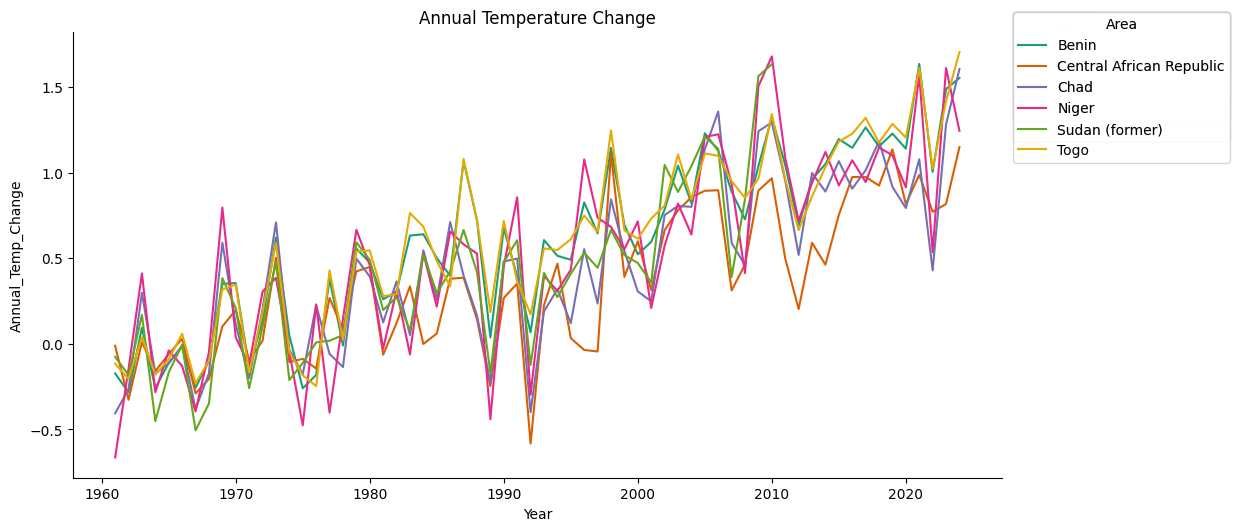

In [ ]:
# @title Annual Temperature Change in the Target Countries
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Year']
  ys = series['Annual_Temp_Change']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = temperature_change.sort_values('Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Area')):
  _plot_series(series, series_name, i)
  fig.legend(title='Area', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Year')
_ = plt.ylabel('Annual_Temp_Change')
plt.title('Annual Temperature Change')

## Working on ***Crop Production*** data frame

In [ ]:
production.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,204,Benin,5312,Area harvested,01312,Bananas,1961,1961,ha,2000.0,A,Official figure,NaN
1,QCL,Crops and livestock products,204,Benin,5412,Yield,01312,Bananas,1961,1961,kg/ha,5000.0,A,Official figure,NaN
2,QCL,Crops and livestock products,204,Benin,5510,Production,01312,Bananas,1961,1961,t,10000.0,A,Official figure,NaN
3,QCL,Crops and livestock products,204,Benin,5312,Area harvested,01312,Bananas,1962,1962,ha,2000.0,E,Estimated value,NaN
4,QCL,Crops and livestock products,204,Benin,5412,Yield,01312,Bananas,1962,1962,kg/ha,5000.0,E,Estimated value,NaN


In [ ]:
rv_cols =  ['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Item Code (CPC)', 'Year Code', 'Unit', 'Flag','Flag Description','Note']

In [ ]:
production.drop(columns = rv_cols, inplace = True)

In [ ]:
production.head()

,Area,Element,Item,Year,Value
0,Benin,Area harvested,Bananas,1961,2000.0
1,Benin,Yield,Bananas,1961,5000.0
2,Benin,Production,Bananas,1961,10000.0
3,Benin,Area harvested,Bananas,1962,2000.0
4,Benin,Yield,Bananas,1962,5000.0


In [ ]:
yields = production.pivot(columns = 'Element', values = 'Value', index = ['Area', 'Year','Item']).reset_index().drop(columns = ['Production'])


In [ ]:
yields.head()

Element,Area,Year,Item,Area harvested,Yield
0,Benin,1961,Bananas,2000.0,5000.0
1,Benin,1961,"Beans, dry",125920.0,287.4
2,Benin,1961,"Beer of barley, malted",NaN,NaN
3,Benin,1961,"Cashew nuts, in shell",2000.0,25.0
4,Benin,1961,"Cassava, fresh",74000.0,3783.8


In [ ]:
yields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21341 entries, 0 to 21340
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            21341 non-null  object 
 1   Year            21341 non-null  int64  
 2   Item            21341 non-null  object 
 3   Area harvested  15344 non-null  float64
 4   Yield           15064 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 833.8+ KB


In [ ]:
yields[yields.isna().any(axis = 1)]

Element,Area,Year,Item,Area harvested,Yield
2,Benin,1961,"Beer of barley, malted",NaN,NaN
10,Benin,1961,Cocoa beans,NaN,NaN
11,Benin,1961,Coconut oil,NaN,NaN
14,Benin,1961,"Cotton lint, ginned",NaN,NaN
15,Benin,1961,Cotton seed,NaN,NaN
...,...,...,...,...,...
21302,Togo,2023,"Cloves (whole stems), raw",NaN,NaN
21312,Togo,2023,Leeks and other alliaceous vegetables,NaN,NaN
21314,Togo,2023,"Mangoes, guavas and mangosteens",NaN,NaN
21321,Togo,2023,"Other fibre crops, raw, n.e.c.",NaN,NaN


In [ ]:
yields.dropna(inplace = True)

In [ ]:
yields.Item.unique()

array(['Bananas', 'Beans, dry', 'Cashew nuts, in shell', 'Cassava, fresh',
       'Castor oil seeds', 'Cereals, primary',
       'Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw',
       'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)',
       'Citrus Fruit, Total', 'Coconuts, in shell', 'Coffee, green',
       'Fibre Crops, Fibre Equivalent', 'Fonio', 'Fruit Primary',
       'Groundnuts, excluding shelled', 'Karite nuts (sheanuts)',
       'Maize (corn)', 'Millet', 'Oil palm fruit',
       'Oilcrops, Cake Equivalent', 'Oilcrops, Oil Equivalent',
       'Onions and shallots, dry (excluding dehydrated)', 'Oranges',
       'Other pulses n.e.c.', 'Other vegetables, fresh n.e.c.',
       'Pepper (Piper spp.), raw', 'Pineapples', 'Pulses, Total', 'Rice',
       'Roots and Tubers, Total', 'Seed cotton, unginned', 'Sesame seed',
       'Sorghum', 'Sweet potatoes', 'Taro', 'Tomatoes', 'Treenuts, Total',
       'Unmanufactured tobacco', 'Vegetables Primary', 'Yams', '

In [ ]:
yields.rename(columns = {'Item':'Crop'}, inplace = True)

In [ ]:
yields.head()

Element,Area,Year,Crop,Area harvested,Yield
0,Benin,1961,Bananas,2000.0,5000.0
1,Benin,1961,"Beans, dry",125920.0,287.4
3,Benin,1961,"Cashew nuts, in shell",2000.0,25.0
4,Benin,1961,"Cassava, fresh",74000.0,3783.8
5,Benin,1961,Castor oil seeds,1945.0,307.5


In [ ]:
yields = yields.drop(columns = ['Area harvested'])

In [ ]:
yields.head()

Element,Area,Year,Crop,Yield
0,Benin,1961,Bananas,5000.0
1,Benin,1961,"Beans, dry",287.4
3,Benin,1961,"Cashew nuts, in shell",25.0
4,Benin,1961,"Cassava, fresh",3783.8
5,Benin,1961,Castor oil seeds,307.5


## Working on ***emissions*** data frames

In [ ]:
crop_emission.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Source Code,Source,Unit,Value,Flag,Flag Description,Note
0,GT,Emissions totals,204,Benin,7234,Direct emissions (N2O),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kt,0.0971,E,Estimated value,NaN
1,GT,Emissions totals,204,Benin,7236,Indirect emissions (N2O),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kt,0.0219,E,Estimated value,NaN
2,GT,Emissions totals,204,Benin,7230,Emissions (N2O),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kt,0.1190,E,Estimated value,NaN
3,GT,Emissions totals,204,Benin,724313,Emissions (CO2eq) from N2O (AR5),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kt,31.5350,E,Estimated value,NaN
4,GT,Emissions totals,204,Benin,723113,Emissions (CO2eq) (AR5),5064,Crop Residues,1961,1961,3050,FAO TIER 1,kt,31.5350,E,Estimated value,NaN


In [ ]:
rv2_cols =  ['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Item Code','Source Code', 'Source', 'Year Code', 'Unit', 'Flag','Flag Description','Note']

In [ ]:
crop_emission.drop(columns = rv2_cols, inplace = True)

In [ ]:
crop_emission.head()

,Area,Element,Item,Year,Value
0,Benin,Direct emissions (N2O),Crop Residues,1961,0.0971
1,Benin,Indirect emissions (N2O),Crop Residues,1961,0.0219
2,Benin,Emissions (N2O),Crop Residues,1961,0.1190
3,Benin,Emissions (CO2eq) from N2O (AR5),Crop Residues,1961,31.5350
4,Benin,Emissions (CO2eq) (AR5),Crop Residues,1961,31.5350


In [ ]:

crop_emission = crop_emission.groupby(['Area', 'Year', 'Element'])['Value'].mean().reset_index()
crop_emission.rename(columns={'Value': 'AVG_Emission'}, inplace=True)


In [ ]:
crop_emission.head()

,Area,Year,Element,AVG_Emission
0,Benin,1961,Direct emissions (N2O),0.069425
1,Benin,1961,Emissions (CH4),0.776750
2,Benin,1961,Emissions (CO2eq) (AR5),31.561000
3,Benin,1961,Emissions (CO2eq) from CH4 (AR5),21.749000
4,Benin,1961,Emissions (CO2eq) from N2O (AR5),22.321833


In [ ]:
crop_emission.Item.unique()

array(['Crop Residues', 'Rice Cultivation', 'Burning - Crop residues',
       'Enteric Fermentation', 'Manure Management',
       'Manure left on Pasture', 'Manure applied to Soils',
       'Synthetic Fertilizers', 'Drained organic soils',
       'Drained organic soils (CO2)', 'Drained organic soils (N2O)',
       'On-farm energy use', 'Net Forest conversion', 'Savanna fires',
       'Fires in organic soils', 'Fires in humid tropical forests',
       'Emissions on agricultural land', 'Emissions from crops'],
      dtype=object)

In [ ]:
target_cols = ['Crop Residues', 'Rice Cultivation', 'Burning - Crop residues', 'Manure Management', 'Manure applied to Soils',
       'Synthetic Fertilizers', 'Drained organic soils',
       'Drained organic soils (CO2)', 'Drained organic soils (N2O)',
       'On-farm energy use',
       'Fires in organic soils',
       'Emissions on agricultural land', 'Emissions from crops']

In [ ]:
crop_emission = crop_emission[crop_emission['Item'].isin(target_cols)]

In [ ]:
crop_emission.Element.unique()

array(['Direct emissions (N2O)', 'Indirect emissions (N2O)',
       'Emissions (N2O)', 'Emissions (CO2eq) from N2O (AR5)',
       'Emissions (CO2eq) (AR5)', 'Emissions (CH4)',
       'Emissions (CO2eq) from CH4 (AR5)', 'Emissions (CO2)'],
      dtype=object)

In [ ]:
avg_emissions = ['Emissions (N2O)','Emissions (CO2)','Emissions (CH4)']
crop_emission = crop_emission[crop_emission['Element'].isin(avg_emissions)]

In [ ]:
crop_emission.head()

,Area,Year,Element,AVG_Emission
1,Benin,1961,Emissions (CH4),0.776750
5,Benin,1961,Emissions (N2O),0.084233
8,Benin,1962,Emissions (CH4),0.891575
12,Benin,1962,Emissions (N2O),0.089567
15,Benin,1963,Emissions (CH4),0.874075


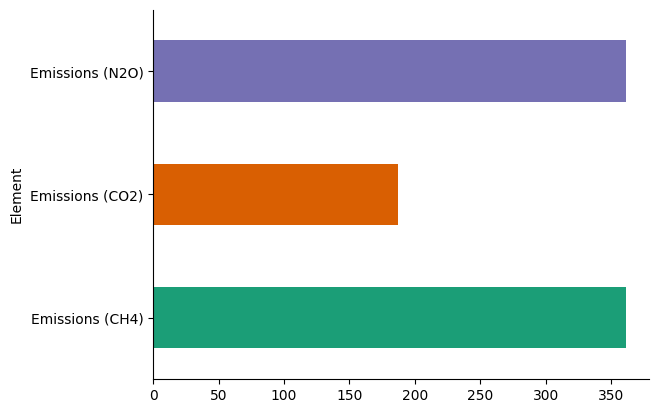

In [ ]:
# @title Emission Sources

from matplotlib import pyplot as plt
import seaborn as sns
crop_emission.groupby('Element').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

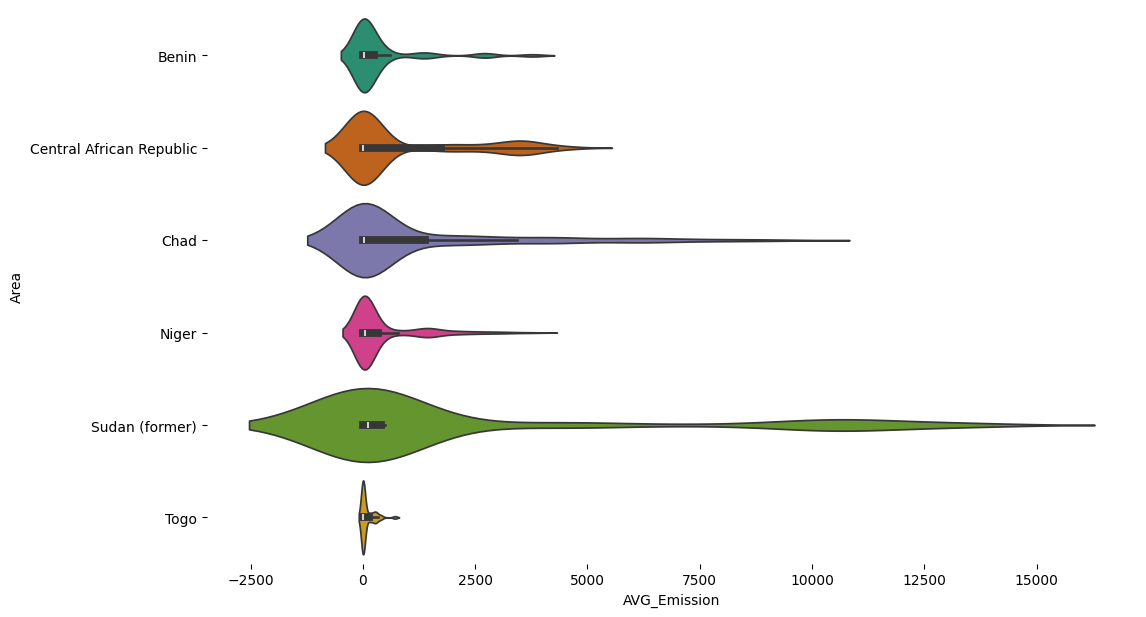

In [ ]:
# @title Average Emission by Country

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(crop_emission['Area'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(crop_emission, x='AVG_Emission', y='Area', inner='box', palette='Dark2', hue = 'Area', legend=False)
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
crop_emission = crop_emission.pivot(columns='Element', values='AVG_Emission', index = ['Area', 'Year'])


In [ ]:
crop_emission.reset_index(inplace = True)

In [ ]:
crop_emission.head()

Element,Area,Year,Emissions (CH4),Emissions (CO2),Emissions (N2O)
0,Benin,1961,0.776750,NaN,0.084233
1,Benin,1962,0.891575,NaN,0.089567
2,Benin,1963,0.874075,NaN,0.091617
3,Benin,1964,0.905375,NaN,0.095200
4,Benin,1965,0.890650,NaN,0.096150


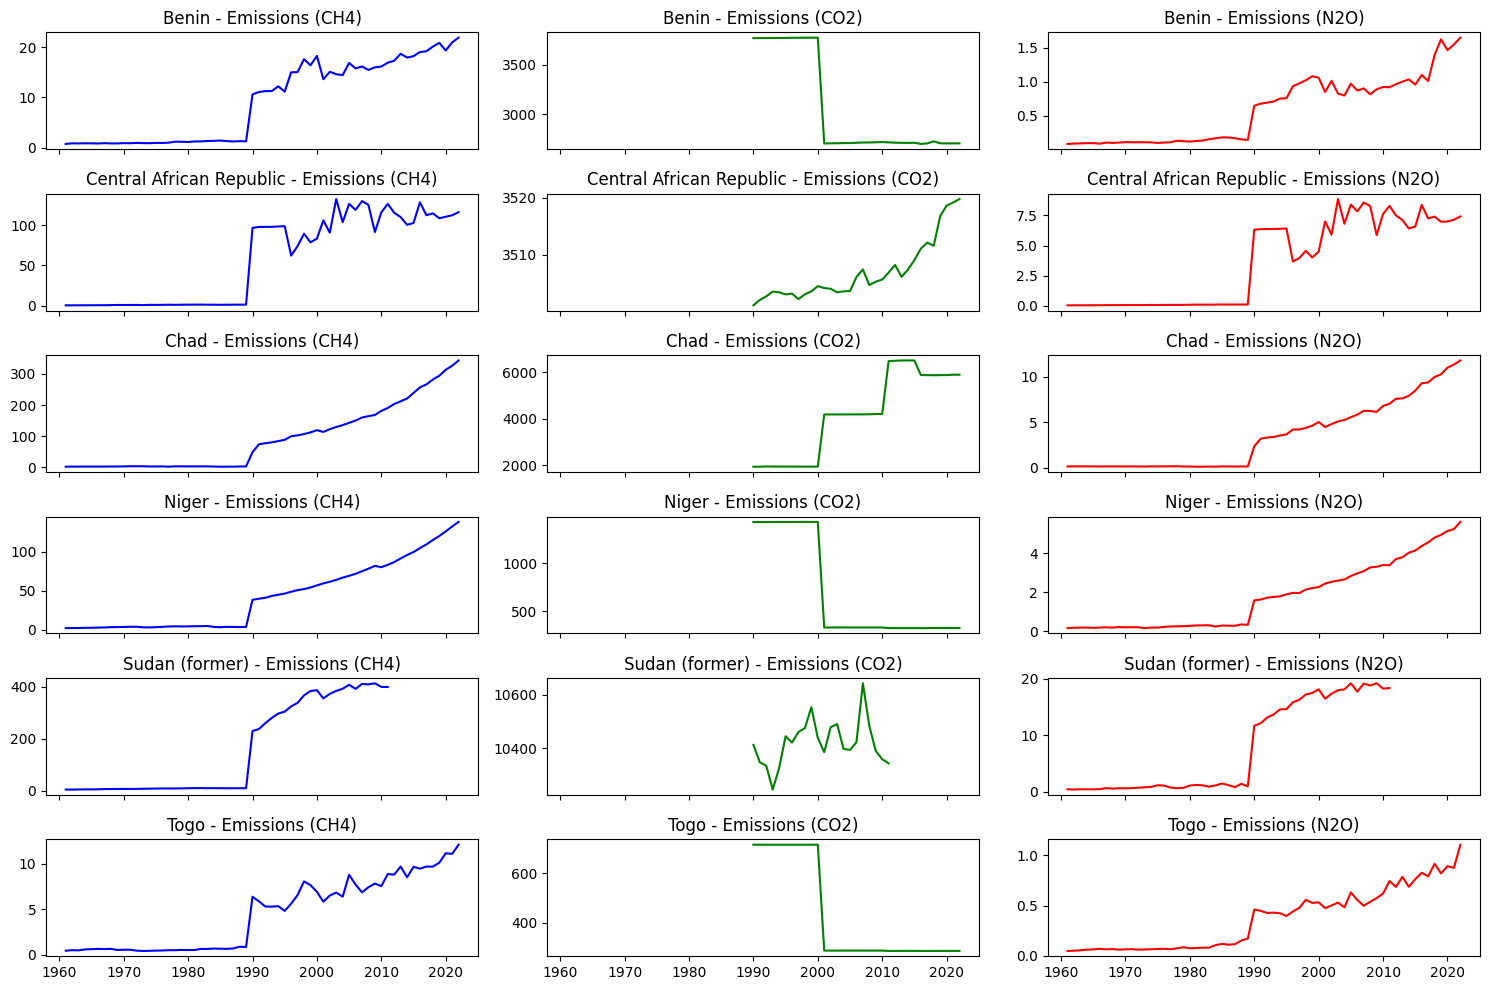

In [ ]:
# @title Crop Emissions Evolution in the Target Countries

target_countries = ['Benin', 'Central African Republic', 'Chad', 'Niger', 'Sudan (former)', 'Togo']
plot_cols = ['Emissions (CH4)','Emissions (CO2)','Emissions (N2O)']

emission_colors = {
    'Emissions (CH4)': 'blue',
    'Emissions (CO2)': 'green',
    'Emissions (N2O)': 'red'
}

fig, axes = plt.subplots(len(target_countries), len(plot_cols), figsize=(15, 10), sharex=True)

for i, country in enumerate(target_countries):
    df = crop_emission[crop_emission['Area'] == country]
    date_time = df['Year'].unique()

    for j, emission in enumerate(plot_cols):
        plot_features = df[[emission]]
        plot_features.index = date_time
        axes[i, j].plot(plot_features, color=emission_colors[emission])
        axes[i, j].set_title(f"{country} - {emission}")

plt.tight_layout()
plt.show()

## Working on ***pesticide use*** data frames

In [ ]:
pesticides_use.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
609,RP,Pesticides Use,204,Benin,5157,Agricultural Use,1357,Pesticides (total),1990,1990,t,1378.13,E,Estimated value,Estimated using net trade
610,RP,Pesticides Use,204,Benin,5159,Use per area of cropland,1357,Pesticides (total),1990,1990,kg/ha,0.81,E,Estimated value,Estimated Value
611,RP,Pesticides Use,204,Benin,5172,Use per capita,1357,Pesticides (total),1990,1990,kg/cap,0.27,E,Estimated value,Estimated Value
612,RP,Pesticides Use,204,Benin,5173,Use per value of agricultural production,1357,Pesticides (total),1990,1990,g/Int$,1.20,E,Estimated value,Estimated Value
613,RP,Pesticides Use,204,Benin,5157,Agricultural Use,1357,Pesticides (total),1991,1991,t,1378.13,E,Estimated value,Estimated using net trade


In [ ]:
rv3_cols =  ['Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Item Code','Year Code', 'Unit', 'Flag','Flag Description','Note']

In [ ]:
pesticides_use.drop(columns = rv3_cols, inplace = True)

<ipython-input-43-ba30c03983fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pesticides_use.drop(columns = rv3_cols, inplace = True)


In [ ]:
pesticides_use.head()

,Area,Element,Item,Year,Value
609,Benin,Agricultural Use,Pesticides (total),1990,1378.13
610,Benin,Use per area of cropland,Pesticides (total),1990,0.81
611,Benin,Use per capita,Pesticides (total),1990,0.27
612,Benin,Use per value of agricultural production,Pesticides (total),1990,1.20
613,Benin,Agricultural Use,Pesticides (total),1991,1378.13


In [ ]:
pesticides_use.Item.unique()

array(['Pesticides (total)', 'Insecticides', 'Herbicides',
       'Fungicides and Bactericides', 'Plant Growth Regulators',
       'Rodenticides', 'Other Pesticides nes',
       'Insecticides – Organo-phosphates', 'Insecticides – Carbamates',
       'Insecticides – Pyrethroids', 'Insecticides - nes',
       'Insecticides – Chlorinated Hydrocarbons',
       'Insecticides - Biopesticides',
       'Herbicides – Phenoxy hormone products', 'Herbicides – Triazines',
       'Herbicides – Amides', 'Herbicides – Carbamates',
       'Herbicides – Dinitroanilines', 'Herbicides – Urea derivates',
       'Herbicides – Sulfonyl ureas', 'Herbicides – Bipiridils',
       'Herbicides - nes', 'Fung & Bact – Inorganics',
       'Fung & Bact – Dithiocarbamates', 'Fung & Bact – Benzimidazoles',
       'Fung & Bact – Triazoles, diazoles',
       'Fung & Bact – Diazines, morpholines', 'Fung & Bact - nes',
       'Rodenticides – Anti-coagulants',
       'Rodenticides – Cyanide Generators', 'Rodenticides – Oth

In [ ]:
pesticides_use.Element.unique()

array(['Agricultural Use', 'Use per area of cropland', 'Use per capita',
       'Use per value of agricultural production'], dtype=object)

In [ ]:
pesticides_use = pesticides_use[pesticides_use['Element'] == 'Use per area of cropland'].drop(columns = ['Element'])

In [ ]:
pesticides_use.head()

,Area,Item,Year,Value
610,Benin,Pesticides (total),1990,0.81
614,Benin,Pesticides (total),1991,0.80
618,Benin,Pesticides (total),1992,0.77
622,Benin,Pesticides (total),1993,0.67
626,Benin,Pesticides (total),1994,0.87


In [ ]:
pesticides_use = pesticides_use.pivot(columns = 'Item', values = 'Value', index = ['Area', 'Year']).reset_index().rename(columns = {'Pesticides (total)':'Pesticide_per_unit_area'})

In [ ]:
pesticides_use.head()

Item,Area,Year,Pesticide_per_unit_area
0,Benin,1990,0.81
1,Benin,1991,0.80
2,Benin,1992,0.77
3,Benin,1993,0.67
4,Benin,1994,0.87


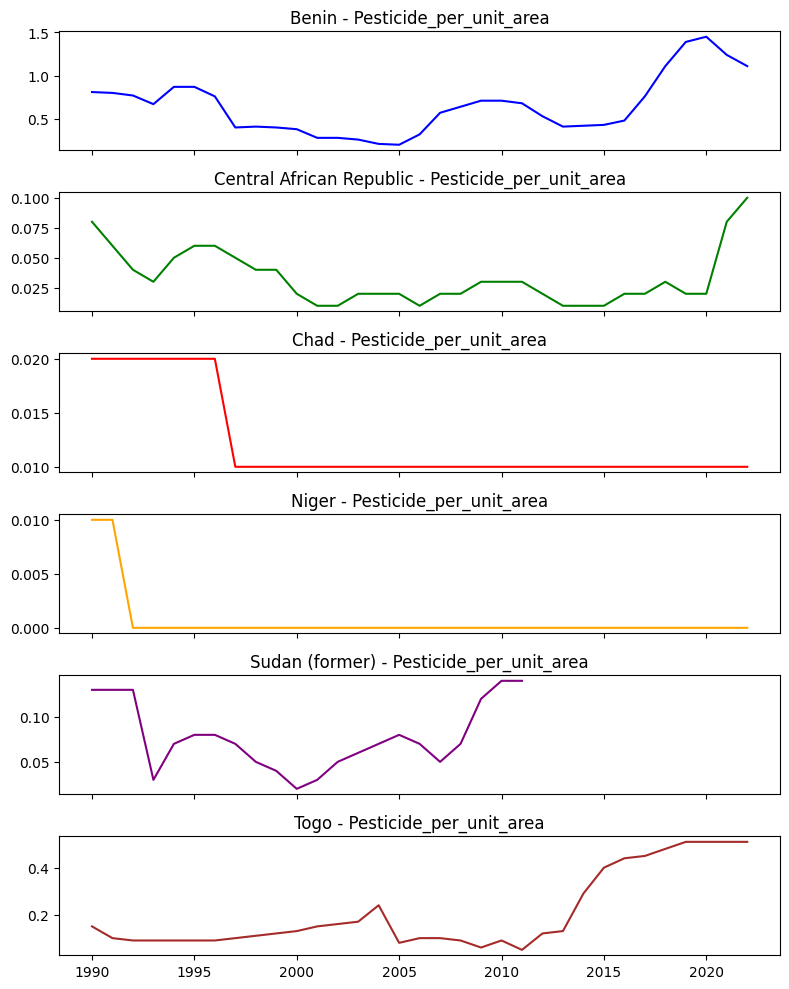

In [ ]:
# @title Pesticides use Evolution in the Target Countries

target_countries = ['Benin', 'Central African Republic', 'Chad', 'Niger', 'Sudan (former)', 'Togo']
plot_col = 'Pesticide_per_unit_area'

n_colors = {
    '1': 'blue',
    '2': 'green',
    '3': 'red',
    '4': 'orange',
    '5': 'purple',
    '6': 'brown',
}

fig, axes = plt.subplots(len(target_countries), 1, figsize=(8, 10), sharex=True)

for i, country in enumerate(target_countries):
    df = pesticides_use[pesticides_use['Area'] == country]
    date_time = df['Year'].unique()


    plot_features = df[[plot_col]]
    plot_features.index = date_time
    axes[i].plot(plot_features, color=n_colors[str(i+1)])
    axes[i].set_title(f"{country} - {plot_col}")

plt.tight_layout()
plt.show()

## Working on ***rainfalls data***

In [ ]:
precipitation_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,NaN,327.0,327.0,327.0,327.0,327.0,...,327.0,327.0,327.0,327.0,327.0,327.0,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Average precipitation in depth (mm per year),AG.LND.PRCP.MM,NaN,1010.0,1010.0,1010.0,1010.0,1010.0,...,1010.0,1010.0,1010.0,1010.0,1010.0,1010.0,NaN,NaN,NaN,NaN


In [ ]:
countries = ['Benin', 'Central African Republic', 'Chad', 'Niger', 'Sudan', 'Togo']

In [ ]:
precipitation = precipitation_data[precipitation_data['Country Name'].isin(countries)]

In [ ]:
precipitation['Country Name'].unique()

array(['Benin', 'Central African Republic', 'Niger', 'Sudan', 'Chad',
       'Togo'], dtype=object)

In [ ]:
precipitation = precipitation.drop(columns = ['Country Code', 'Indicator Name', 'Indicator Code'])

In [ ]:
precipitation.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
18,Benin,NaN,1039.0,1039.0,1039.0,1039.0,1039.0,1039.0,1039.0,1039.0,...,1039.0,1039.0,1039.0,1039.0,1039.0,1039.0,NaN,NaN,NaN,NaN
34,Central African Republic,NaN,1343.0,1343.0,1343.0,1343.0,1343.0,1343.0,1343.0,1343.0,...,1343.0,1343.0,1343.0,1343.0,1343.0,1343.0,NaN,NaN,NaN,NaN
173,Niger,NaN,151.0,151.0,151.0,151.0,151.0,151.0,151.0,151.0,...,151.0,151.0,151.0,151.0,151.0,151.0,NaN,NaN,NaN,NaN
206,Sudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,250.0,250.0,250.0,250.0,250.0,250.0,NaN,NaN,NaN,NaN
229,Chad,NaN,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,...,322.0,322.0,322.0,322.0,322.0,322.0,NaN,NaN,NaN,NaN


In [ ]:
precipitation = pd.melt(precipitation, id_vars=['Country Name'], var_name='Year', value_name='AVG_Precipitation')
precipitation = precipitation[pd.to_numeric(precipitation['Year'], errors='coerce').notna()]
precipitation['Year'] = pd.to_numeric(precipitation['Year'])
precipitation.head()

,Country Name,Year,AVG_Precipitation
0,Benin,1960,NaN
1,Central African Republic,1960,NaN
2,Niger,1960,NaN
3,Sudan,1960,NaN
4,Chad,1960,NaN


In [ ]:
precipitation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 0 to 389
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country Name       390 non-null    object 
 1   Year               390 non-null    int64  
 2   AVG_Precipitation  315 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.2+ KB


In [ ]:
precipitation.rename(columns = {'Country Name':'Area'}, inplace = True)

## Data concatenation

In [ ]:
input_crop_nutrient['Area'] = np.where(input_crop_nutrient['Area'] == 'Sudan','Sudan (former)', input_crop_nutrient['Area'])
output_crop_nutrient['Area'] = np.where(output_crop_nutrient['Area'] == 'Sudan','Sudan (former)', output_crop_nutrient['Area'])
temperature_change['Area'] = np.where(temperature_change['Area'] == 'Sudan','Sudan (former)', temperature_change['Area'])
yields['Area'] = np.where(yields['Area'] == 'Sudan','Sudan (former)', yields['Area'])
crop_emission['Area'] = np.where(crop_emission['Area'] == 'Sudan','Sudan (former)', crop_emission['Area'])
pesticides_use['Area'] = np.where(pesticides_use['Area'] == 'Sudan','Sudan (former)', pesticides_use['Area'])
precipitation['Area'] = np.where(precipitation['Area'] == 'Sudan','Sudan (former)', precipitation['Area'])

In [ ]:
merged_df = input_crop_nutrient.merge(output_crop_nutrient, on=['Area', 'Year'], how='outer')
merged_df = merged_df.merge(temperature_change, on=['Area', 'Year'], how='outer')
merged_df = merged_df.merge(yields, on=['Area', 'Year'], how='outer')
merged_df = merged_df.merge(crop_emission, on=['Area', 'Year'], how='outer')
merged_df = merged_df.merge(pesticides_use, on=['Area', 'Year'], how='outer')
merged_df = merged_df.merge(precipitation, on=['Area', 'Year'], how='outer')

In [ ]:
merged_df.head()

,Area,Year,In_nitrogen_per_unit_area,In_phosphorus_per_unit_area,In_potassium_per_unit_area,Out_nitrogen_per_unit_area,Out_phosphorus_per_unit_area,Out_potassium_per_unit_area,Annual_Temp_Change,Crop,Yield,Emissions (CH4),Emissions (CO2),Emissions (N2O),Pesticide_per_unit_area,AVG_Precipitation
0,Benin,1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Benin,1961,18.3131,1.4967,4.1579,12.2015,2.5893,7.6966,-0.173,Bananas,5000.0,0.77675,NaN,0.084233,NaN,1039.0
2,Benin,1961,18.3131,1.4967,4.1579,12.2015,2.5893,7.6966,-0.173,"Beans, dry",287.4,0.77675,NaN,0.084233,NaN,1039.0
3,Benin,1961,18.3131,1.4967,4.1579,12.2015,2.5893,7.6966,-0.173,"Cashew nuts, in shell",25.0,0.77675,NaN,0.084233,NaN,1039.0
4,Benin,1961,18.3131,1.4967,4.1579,12.2015,2.5893,7.6966,-0.173,"Cassava, fresh",3783.8,0.77675,NaN,0.084233,NaN,1039.0


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15088 entries, 0 to 15087
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Area                          15088 non-null  object 
 1   Year                          15088 non-null  int64  
 2   In_nitrogen_per_unit_area     12276 non-null  float64
 3   In_phosphorus_per_unit_area   12276 non-null  float64
 4   In_potassium_per_unit_area    12276 non-null  float64
 5   Out_nitrogen_per_unit_area    12276 non-null  float64
 6   Out_phosphorus_per_unit_area  12276 non-null  float64
 7   Out_potassium_per_unit_area   12276 non-null  float64
 8   Annual_Temp_Change            15011 non-null  float64
 9   Crop                          15064 non-null  object 
 10  Yield                         15064 non-null  float64
 11  Emissions (CH4)               14837 non-null  float64
 12  Emissions (CO2)               8581 non-null   float64
 13  E

In [ ]:
cleaned_data = merged_df.dropna()

In [ ]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7143 entries, 1208 to 14996
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Area                          7143 non-null   object 
 1   Year                          7143 non-null   int64  
 2   In_nitrogen_per_unit_area     7143 non-null   float64
 3   In_phosphorus_per_unit_area   7143 non-null   float64
 4   In_potassium_per_unit_area    7143 non-null   float64
 5   Out_nitrogen_per_unit_area    7143 non-null   float64
 6   Out_phosphorus_per_unit_area  7143 non-null   float64
 7   Out_potassium_per_unit_area   7143 non-null   float64
 8   Annual_Temp_Change            7143 non-null   float64
 9   Crop                          7143 non-null   object 
 10  Yield                         7143 non-null   float64
 11  Emissions (CH4)               7143 non-null   float64
 12  Emissions (CO2)               7143 non-null   float64
 13  Emis

In [ ]:
cleaned_data.Year.unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [ ]:
cleaned_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,7143.0,2005.670307,9.195081,1990.000000,1998.000000,2006.000000,2014.000000,2021.000000
In_nitrogen_per_unit_area,7143.0,20.959337,8.861547,5.672700,15.004400,21.274800,27.209200,41.957100
In_phosphorus_per_unit_area,7143.0,1.705988,1.079908,0.276400,1.034000,1.618900,2.199500,5.944300
In_potassium_per_unit_area,7143.0,4.983083,2.688913,1.123200,2.643200,4.731200,6.834700,12.880400
Out_nitrogen_per_unit_area,7143.0,14.285979,6.902166,3.658000,8.762800,12.904200,18.710700,33.884700
Out_phosphorus_per_unit_area,7143.0,2.723508,1.412067,0.649300,1.550600,2.509000,3.546600,6.640100
Out_potassium_per_unit_area,7143.0,7.244110,4.327705,1.204900,4.433800,6.010600,9.089600,18.971800
Annual_Temp_Change,7143.0,0.798104,0.389442,-0.583000,0.553000,0.826000,1.087000,1.679000
Yield,7143.0,5627.136861,11723.129945,44.100000,603.350000,1568.000000,5858.250000,104329.200000
Emissions (CH4),7143.0,67.619262,63.585407,4.798700,14.433114,56.866300,104.616543,325.803943


In [ ]:
# @title Dealing with periodicity
df = cleaned_data.copy()
df = df.sort_values(by='Year')
min_year = df['Year'].min()
max_year = df['Year'].max()
year_range = max_year - min_year + 1

norm = df['Year'] - min_year
df['Year sin'] = np.sin(2 * np.pi * norm / year_range)
df['Year cos'] = np.cos(2 * np.pi * norm / year_range)


Text(0.5, 1.0, 'Time of year signal')

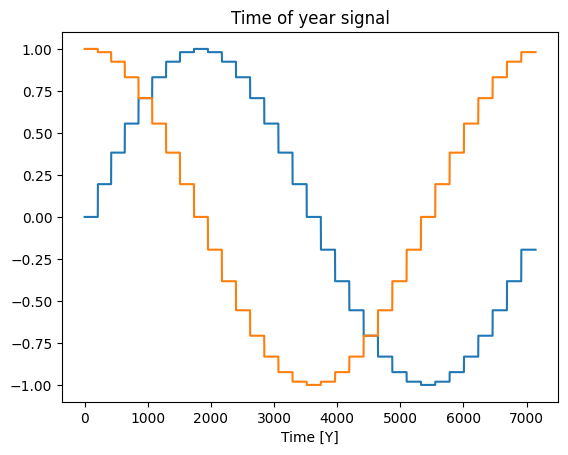

In [ ]:
plt.plot(np.array(df['Year sin'])[:])
plt.plot(np.array(df['Year cos'])[:])
plt.xlabel('Time [Y]')
plt.title('Time of year signal')

In [ ]:
# @title Data Splitting
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
df = df.drop(columns = ['Year'])
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [ ]:
# @title Normalization

numeric_cols = train_df.select_dtypes(include=np.number).columns
train_mean = train_df[numeric_cols].mean()
train_std = train_df[numeric_cols].std()


train_df[numeric_cols] = (train_df[numeric_cols] - train_mean) / train_std
val_df[numeric_cols] = (val_df[numeric_cols] - train_mean) / train_std
test_df[numeric_cols] = (test_df[numeric_cols] - train_mean) / train_std

<ipython-input-165-d5677dea8997>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


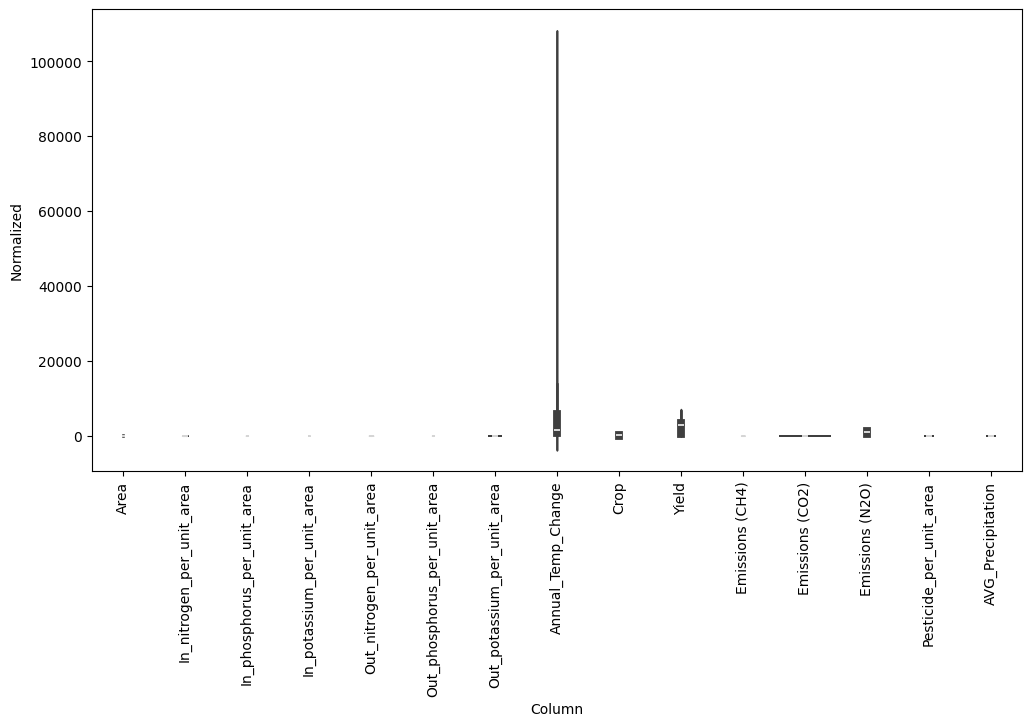

In [ ]:
df_std = (df[numeric_cols] - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

# ML Model

In [ ]:
def xavier_normal_init(shape):
  input_dim, output_dim = shape
  std = tf.sqrt(2.)/tf.sqrt(tf.cast(input_dim + output_dim, dtype = tf.float32))
  weight_values = tf.random.normal(shape, stddev=std)
  return weight_values

In [ ]:
class DenseLayer(tf.Module):
  def __init__(self, output_dim, weight_init_fn = xavier_normal_init, activation = tf.identity):
    self.output_dim = output_dim
    self.weight_init_fn = weight_init_fn
    self.activation = activation
    self.built = False

  def __call__(self, x):
    if not self.built:
      self.input_dim = x.shape[-1]
      self.weight = tf.Variable(self.weight_init_fn((self.input_dim, self.output_dim)), name = "weight")
      self.bias = tf.Variable(tf.zeros((self.output_dim, )), name = "bias")
      self.built = True
    z = tf.add(tf.matmul(x, self.weight), self.bias)
    return self.activation(z)

In [ ]:
class AdamOptimizer:
  def __init__(self, learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8):
    self.learning_rate = learning_rate
    self.beta_1 = beta_1
    self.beta_2 = beta_2
    self.learning_rate = learning_rate
    self.epsilon = epsilon
    self.t = 1.
    self.v_dvar, self.s_dvar = [], []
    self.built = False

  def apply_gradients(self, grads, vars):
    if not self.built:
      for var in vars:
        s = tf.Variable(tf.zeros(var.shape))
        v = tf.Variable(tf.zeros(var.shape))
        self.v_dvar.append(v)
        self.s_dvar.append(s)
      self.built = True
    for i, (grad, var) in enumerate(zip(grads, vars)):
      self.v_dvar[i].assign(self.beta_1 * self.v_dvar[i] + (1 - self.beta_1) * grad)
      self.s_dvar[i].assign(self.beta_2 * self.s_dvar[i] + (1 - self.beta_2) * tf.square(grad))
      v_corrected = self.v_dvar[i] / (1 - tf.pow(self.beta_1, self.t))
      s_corrected = self.s_dvar[i] / (1 - tf.pow(self.beta_2, self.t))
      var.assign_sub(self.learning_rate * v_corrected / (tf.sqrt(s_corrected) + self.epsilon))
    self.t += 1

In [ ]:
class BetaScheduler(keras.callbacks.Callback):
    def __init__(self, beta, initial_beta=1.0, min_beta=0.1, decay_rate=0.1):
        super().__init__()
        self.beta = beta
        self.initial_beta = initial_beta
        self.min_beta = min_beta
        self.decay_rate = decay_rate

    def on_epoch_begin(self, epoch, logs=None):
        new_beta = max(self.min_beta, self.initial_beta - self.decay_rate * epoch)   #min(self.max_beta, (epoch + 1) / self.anneal_epochs * self.max_beta)
        self.beta.assign(new_beta)
        print(f"Epoch {epoch+1}: Beta = {self.beta.numpy():.4f}")

# Initialize Beta
beta = tf.Variable(0.0, trainable=False, dtype=tf.float32)
beta_scheduler = BetaScheduler(beta)

In [ ]:
class Lagrange_Constrained_VAE_Encoder(keras.Model):
  def __init__(self, latent_dim):

    super(Lagrange_Constrained_VAE_Encoder, self).__init__()
    self.latent_dim = latent_dim
    self.conv1 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")
    self.conv2 = layers.Conv2D(32, (3, 3), activation="relu", padding="same")  # 1 Conv Layer
    self.pool = layers.MaxPooling2D((2, 2))
    self.flatten = layers.GlobalMaxPooling2D()
    self.dense1 = layers.Dense(128, activation=tf.nn.relu)
    self.loc_layer = layers.Dense(latent_dim)  # Mean layer
    self.logvar_layer = layers.Dense(latent_dim)  # Log variance layer
    self.seed_generator = keras.random.SeedGenerator(1337)


  def sample_latent(self, inputs):
    z_mean, z_log_var = inputs
    batch_size = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = keras.random.normal(shape=(batch_size, dim), seed = self.seed_generator)
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

  def call(self, inputs):
    x = self.conv1(inputs)
    x = self.conv2(x)
    x = self.pool(x)
    x = self.flatten(x)  # Convert (10, 12) → (120)
    x = self.dense1(x)
    mu = self.loc_layer(x)  # Mean of latent distribution
    logvar = self.logvar_layer(x)  # Log variance
    z = self.sample_latent([mu, logvar])

    return mu, logvar, z

In [ ]:
class Lagrange_Constrained_VAE_Decoder(keras.Model):
    def __init__(self,output_shape=(10, 12, 1)):
        super(Lagrange_Constrained_VAE_Decoder, self).__init__()

        self.output_shape = output_shape

        # Expand latent vector to a feature map
        self.dense1 = layers.Dense(128, activation="relu")
        self.dense2 = layers.Dense(64 * 5 * 6, activation="relu")  # Increased spatial size
        self.reshape = layers.Reshape((5, 6, 64))  # Larger reshaped feature map

        # Upsampling to match (10,12)
        self.convT1 = layers.Conv2DTranspose(64, (3, 3), strides=2, activation="relu", padding="same")
        self.convT2 = layers.Conv2DTranspose(32, (3, 3), activation="relu", padding="same")
        self.convT3 = layers.Conv2DTranspose(1, (3, 3), activation="sigmoid", padding="same")  # Final output

    def call(self, z):
        x = self.dense1(z)
        x = self.dense2(x)
        x = self.reshape(x)  # Now (5,6,64)
        x = self.convT1(x)  # Upsample to (10,12,32)
        x = self.convT2(x)  # Keep spatial size (10,12,32)
        x = self.convT3(x)  # Final output (10,12,1)
        return x



In [ ]:
class Lagrange_Constrained_VAE(keras.Model):
    def __init__(self,encoder, decoder, lambda_lagrange_init = 1.0, **kwargs):
        super(Lagrange_Constrained_VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.lambda_lagrange = tf.Variable(lambda_lagrange_init, trainable = True, dtype = tf.float32)
        self.total_loss = keras.metrics.Mean(name = 'total_loss')
        self.reconstruction_loss = keras.metrics.Mean(name = 'reconstruction_loss')
        self.kl_loss = keras.metrics.Mean(name = 'kl_loss')
        self.constraint_loss = keras.metrics.Mean(name = 'constraints_loss')

    @property
    def metrics(self):
      return [
              self.total_loss,
              self.reconstruction_loss,
              self.kl_loss,
              self.constraint_loss
      ]

    def train_step(self, data):
      with tf.GradientTape() as tape:
        z_mean, z_log_var, z = self.encoder(data)
        reconstruction = self.decoder(z)
        reconstruction_loss = tf.reduce_mean(
          tf.reduce_sum(
              keras.losses.binary_crossentropy(data, reconstruction), axis=(1)
          )
      )


        tf.keras.losses.MeanSquaredError(reduction = "sum_over_batch_size")(data, reconstruction)



        kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
        kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
        constraint_loss = tf.reduce_mean(self.lambda_lagrange*tf.square(tf.reduce_sum(z_log_var, axis = 1) - 1))
        total_loss = reconstruction_loss + kl_loss + constraint_loss

      grads = tape.gradient(total_loss, self.trainable_variables)
      self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
      self.total_loss.update_state(total_loss)
      self.reconstruction_loss.update_state(reconstruction_loss)
      self.kl_loss.update_state(kl_loss)
      self.constraint_loss.update_state(constraint_loss)
      return {
          "loss": self.total_loss.result(),
          "reconstruction_loss": self.reconstruction_loss.result(),
          "kl_loss": self.kl_loss.result(),
          "constraint_loss": self.constraint_loss.result()
      }



In [ ]:

class VAE_Encoder(keras.Model):
  def __init__(self, latent_dim):

    super(VAE_Encoder, self).__init__()
    self.latent_dim = latent_dim
    self.conv1 = layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu')
    self.flatten = layers.Flatten()
    self.dense1 = layers.Dense(128, activation=tf.nn.relu)
    self.dense2 = layers.Dense(128, activation=tf.nn.relu)
    self.loc_layer = layers.Dense(latent_dim)  # Mean layer
    self.logvar_layer = layers.Dense(latent_dim)  # Log variance layer
    self.seed_generator = keras.random.SeedGenerator(1337)


  def sample_latent(self, inputs):
    z_mean, z_log_var = inputs
    batch_size = tf.shape(z_mean)[0]
    dim = tf.shape(z_mean)[1]
    epsilon = keras.random.normal(shape=(batch_size, dim), seed = self.seed_generator)
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

  def call(self, inputs):
    x = self.conv1(inputs)
    x = self.flatten(x)  # Convert (10, 12) → (120)
    x = self.dense1(x)
    x = self.dense2(x)
    mu = self.loc_layer(x)  # Mean of latent distribution
    logvar = self.logvar_layer(x)  # Log variance
    z = self.sample_latent([mu, logvar])

    return mu, logvar, z


In [ ]:
class VAE_Decoder(keras.Model):
    def __init__(self,output_shape=(10, 12, 1)):
        super(VAE_Decoder, self).__init__()

        self.output_shape = output_shape

        # Expand latent vector to a feature map
        self.dense1 = layers.Dense(128, activation="relu")
        self.dense2 = layers.Dense(128, activation="relu")  # Increased spatial size
        self.dense3 = layers.Dense(5*6*32, activation="relu")
        self.reshape = layers.Reshape((5, 6, 32))  # Larger reshaped feature map

        # Upsampling to match (10,12)
        self.convT1 = layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, activation="relu", padding="same")
        self.convT2 = layers.Conv2DTranspose(filters=1, kernel_size=3, strides=1, padding='same', activation='sigmoid')  # Final output

    def call(self, z):
        x = self.dense1(z)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.reshape(x)  # Now (5,6,64)
        x = self.convT1(x)  # Upsample to (10,12,32)
        x = self.convT2(x)  # Keep spatial size (10,12,32)
        return x

In [ ]:
class Encoder(keras.Model):
  def __init__(self, latent_dim):

    super(Encoder, self).__init__()
    self.latent_dim = latent_dim
    self.conv1 = layers.Conv2D(filters=32, kernel_size=3, strides=(2, 2), activation='relu')
    self.flatten = layers.Flatten()
    self.dense1 = layers.Dense(128, activation=tf.nn.relu)
    self.dense2 = layers.Dense(128, activation=tf.nn.relu)
    self.latent_layer = layers.Dense(latent_dim)  # Mean layer


  def call(self, inputs):
    x = self.conv1(inputs)
    x = self.flatten(x)  # Convert (10, 12) → (120)
    x = self.dense1(x)
    x = self.dense2(x)
    z = self.latent_layer(x)  # Mean of latent distribution


    return z


In [ ]:
class Decoder(keras.Model):
    def __init__(self,output_shape=(10, 12, 1)):
        super(Decoder, self).__init__()

        self.output_shape = output_shape

        # Expand latent vector to a feature map
        self.dense1 = layers.Dense(128, activation="relu")
        self.dense2 = layers.Dense(128, activation="relu")  # Increased spatial size
        self.dense3 = layers.Dense(5*6*32, activation="relu")
        self.reshape = layers.Reshape((5, 6, 32))  # Larger reshaped feature map

        # Upsampling to match (10,12)
        self.convT1 = layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, activation="relu", padding="same")
        self.convT2 = layers.Conv2DTranspose(filters=1, kernel_size=3, strides=1, padding='same', activation='sigmoid')  # Final output

    def call(self, z):
        x = self.dense1(z)
        x = self.dense2(x)
        x = self.dense3(x)
        x = self.reshape(x)  # Now (5,6,64)
        x = self.convT1(x)  # Upsample to (10,12,32)
        x = self.convT2(x)  # Keep spatial size (10,12,32)
        return x

In [ ]:
class Autoencoder(keras.Model):
    def __init__(self,encoder, decoder, **kwargs):
        super(Autoencoder, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss = keras.metrics.Mean(name = 'total_loss')
        self.reconstruction_loss = keras.metrics.Mean(name = 'reconstruction_loss')

    @property
    def metrics(self):
      return [
              self.total_loss,
              self.reconstruction_loss,

      ]

    def train_step(self, data):
      with tf.GradientTape() as tape:
        z = self.encoder(data)
        reconstruction = self.decoder(z)
        reconstruction_loss = tf.reduce_mean(
          tf.reduce_sum(
              keras.losses.binary_crossentropy(data, reconstruction), axis=(1)
          )
      )



        total_loss = reconstruction_loss

      grads = tape.gradient(total_loss, self.trainable_variables)
      self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
      self.total_loss.update_state(total_loss)
      self.reconstruction_loss.update_state(reconstruction_loss)
      return {
          "loss": self.total_loss.result(),
          "reconstruction_loss": self.reconstruction_loss.result(),

      }





In [ ]:
epochs = 15
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 2
output_shape = (10, 12,1)
encoder = Encoder(latent_dim)
decoder = Decoder(output_shape)
model1 = Autoencoder(encoder, decoder)

In [ ]:
model1.compile(optimizer = keras.optimizers.Adam(learning_rate = .0001))
history = model1.fit(train_data, epochs = 10)

In [ ]:
epochs = 15
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 2
output_shape = (10, 12,1)
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
encoder = Lagrange_Constrained_VAE_Encoder(latent_dim)
decoder = Lagrange_Constrained_VAE_Decoder(output_shape)
model = Lagrange_Constrained_VAE(encoder, decoder)

In [ ]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = .0001))
history = model.fit(train_data, epochs = 10, callbacks = [beta_scheduler])

In [ ]:
for batch in train_data.take(1):  # Take only the first batch
    x1 = batch
x1[0].shape

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="vae_architecture.png", show_shapes=True, show_layer_names=True, expand_nested=True)

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(x1[26].numpy().reshape(10, 12), cmap='gray')  # Reshape if needed
plt.title("Original")

plt.subplot(1,2,2)
plt.imshow(recons[26].numpy().reshape(10, 12), cmap = 'gray')  # Reshape if needed
plt.title("Reconstructed")

plt.show()